<a href="https://colab.research.google.com/github/sgevatschnaider/machine-learning/blob/main/notebooks/es/PERCEPTR%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea de Machine Learning,Activación Capa Salida,Función de Costo
Clasificación Binaria,sigmoid,binary_crossentropy
Clasificación Multiclase,softmax,categorical_crossentropy
Regresión,linear (identidad),"mean_squared_error, mean_absolute_error"

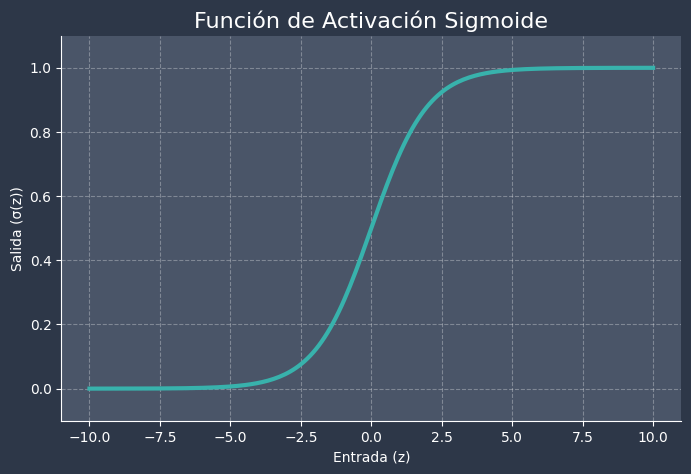
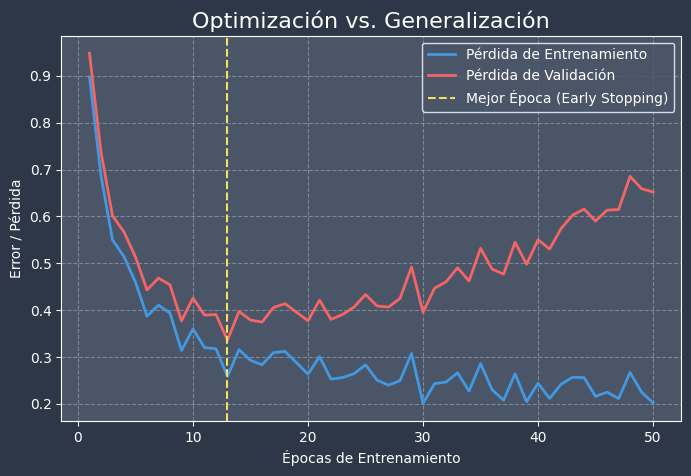
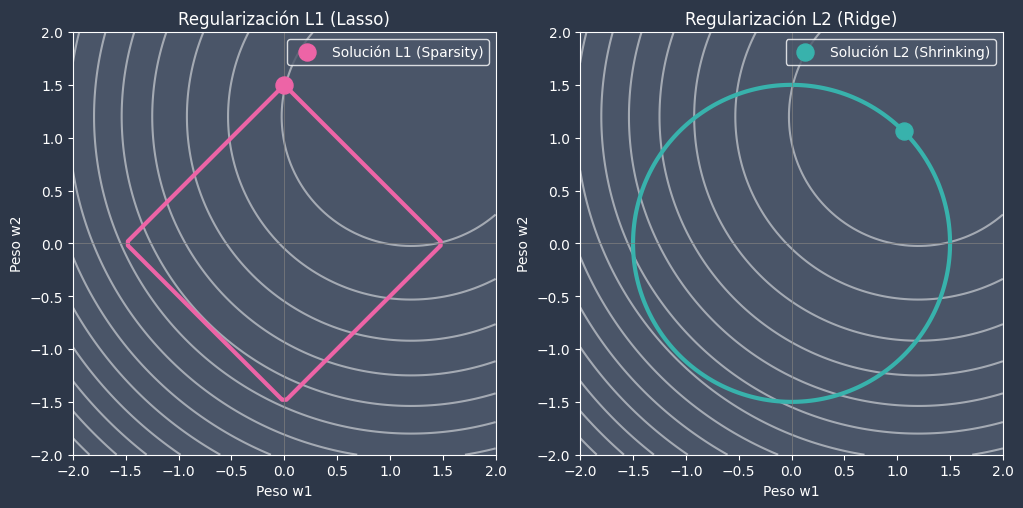
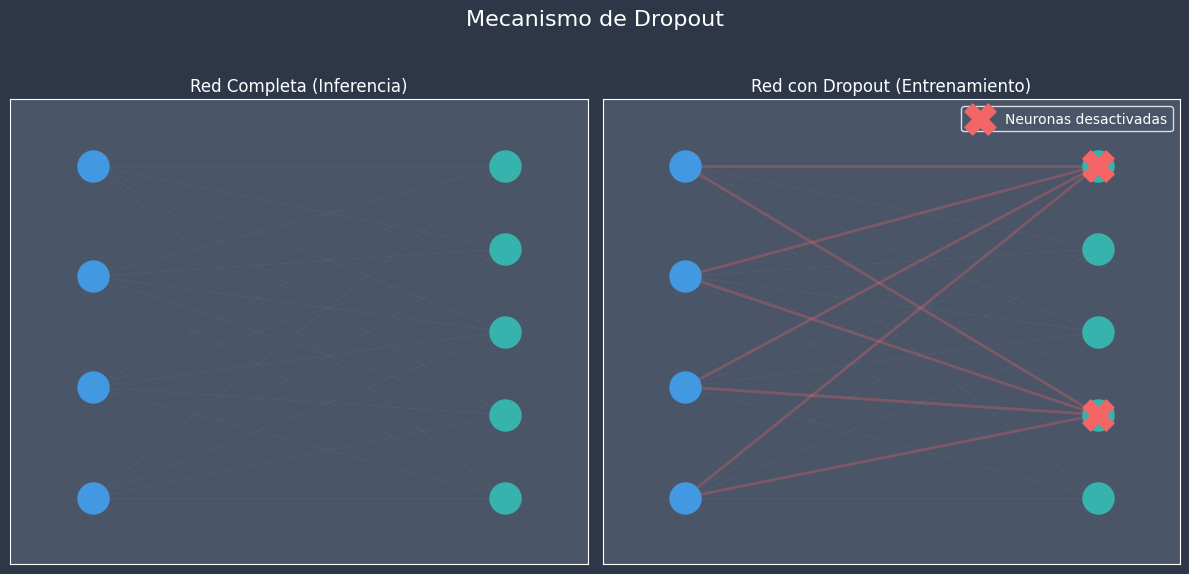

In [ ]:
from IPython.display import display, HTML
import html
import matplotlib.pyplot as plt
import numpy as np
import io
import base64

# --- Funciones para Generar Gráficos Específicos ---

def generate_sigmoid_plot():
    """Crea un gráfico de la función de activación sigmoide."""
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='#2d3748')
    z = np.linspace(-10, 10, 200)
    sigma = 1 / (1 + np.exp(-z))
    ax.plot(z, sigma, color='#38b2ac', lw=3)
    ax.set_title("Función de Activación Sigmoide", color='white', fontsize=16)
    ax.set_xlabel("Entrada (z)", color='white')
    ax.set_ylabel("Salida (σ(z))", color='white')
    ax.set_facecolor('#4a5568')
    ax.tick_params(colors='white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_ylim(-0.1, 1.1)
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', facecolor='#2d3748')
    plt.close(fig)
    buf.seek(0)
    return base64.b64encode(buf.read()).decode('utf-8')

def generate_overfitting_plot():
    """Crea un gráfico que ilustra el sobreajuste (overfitting)."""
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='#2d3748')
    epochs = np.arange(1, 51)
    train_loss = 0.8 / np.sqrt(epochs) + 0.1 + np.random.randn(len(epochs)) * 0.03
    val_loss = train_loss + 0.05 + (epochs / 25)**2 * 0.1
    best_epoch = np.argmin(val_loss)

    ax.plot(epochs, train_loss, color='#4299e1', lw=2, label='Pérdida de Entrenamiento')
    ax.plot(epochs, val_loss, color='#f56565', lw=2, label='Pérdida de Validación')
    ax.axvline(best_epoch + 1, color='#f6e05e', linestyle='--', label=f'Mejor Época (Early Stopping)')
    ax.set_title("Optimización vs. Generalización", color='white', fontsize=16)
    ax.set_xlabel("Épocas de Entrenamiento", color='white')
    ax.set_ylabel("Error / Pérdida", color='white')
    ax.set_facecolor('#4a5568')
    ax.tick_params(colors='white')
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.legend(facecolor='#4a5568', edgecolor='white', labelcolor='white')
    ax.grid(True, linestyle='--', alpha=0.3)
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', facecolor='#2d3748')
    plt.close(fig)
    buf.seek(0)
    return base64.b64encode(buf.read()).decode('utf-8')

def generate_regularization_plot():
    """Crea un gráfico comparando los contornos de L1 y L2."""
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='#2d3748')
    w1, w2 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    loss = (w1 - 1.2)**2 + (w2 - 1.2)**2
    axs[0].contour(w1, w2, loss, levels=15, colors='white', alpha=0.5)
    l1_boundary = np.abs(w1) + np.abs(w2)
    axs[0].contour(w1, w2, l1_boundary, levels=[1.5], colors='#ed64a6', linewidths=3)
    axs[0].set_title('Regularización L1 (Lasso)', color='white')
    axs[0].scatter([0], [1.5], color='#ed64a6', s=150, zorder=5, label='Solución L1 (Sparsity)')

    axs[1].contour(w1, w2, loss, levels=15, colors='white', alpha=0.5)
    l2_boundary = w1**2 + w2**2
    axs[1].contour(w1, w2, l2_boundary, levels=[1.5**2], colors='#38b2ac', linewidths=3)
    axs[1].set_title('Regularización L2 (Ridge)', color='white')
    sol_l2_x, sol_l2_y = 1.2 * 1.5 / np.sqrt(1.2**2 + 1.2**2), 1.2 * 1.5 / np.sqrt(1.2**2 + 1.2**2)
    axs[1].scatter([sol_l2_x], [sol_l2_y], color='#38b2ac', s=150, zorder=5, label='Solución L2 (Shrinking)')

    for ax in axs:
        ax.set_facecolor('#4a5568')
        ax.set_xlabel('Peso w1', color='white')
        ax.set_ylabel('Peso w2', color='white')
        ax.tick_params(colors='white')
        ax.axhline(0, color='gray', lw=0.5)
        ax.axvline(0, color='gray', lw=0.5)
        ax.set_aspect('equal', 'box')
        ax.legend(facecolor='#4a5568', edgecolor='white', labelcolor='white')
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', facecolor='#2d3748')
    plt.close(fig)
    buf.seek(0)
    return base64.b64encode(buf.read()).decode('utf-8')

def generate_dropout_diagram():
    """Crea un diagrama simple para visualizar Dropout."""
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='#2d3748')
    fig.suptitle('Mecanismo de Dropout', color='white', fontsize=16)

    def draw_network(ax, title, dropout=False):
        ax.set_title(title, color='white')
        ax.set_facecolor('#4a5568')
        inputs, hiddens = 4, 5
        y_in = np.linspace(0, 1, inputs)
        y_hid = np.linspace(0, 1, hiddens)
        ax.scatter([0]*inputs, y_in, s=500, c='#4299e1', zorder=5)
        ax.scatter([1]*hiddens, y_hid, s=500, c='#38b2ac', zorder=5)

        dropped_neurons = np.random.permutation(hiddens)[:2] if dropout else []

        for i in range(inputs):
            for j in range(hiddens):
                is_dropped = j in dropped_neurons
                color = '#f56565' if is_dropped else 'gray'
                lw = 2 if is_dropped else 0.5
                alpha = 0.3 if is_dropped else 0.2
                ax.plot([0, 1], [y_in[i], y_hid[j]], color=color, lw=lw, alpha=alpha, zorder=1)

        if dropout:
            ax.scatter([1]*len(dropped_neurons), y_hid[dropped_neurons], s=500, c='#f56565', marker='X', zorder=6, label='Neuronas desactivadas')
            ax.legend(facecolor='#4a5568', edgecolor='white', labelcolor='white')

        ax.set_xlim(-0.2, 1.2)
        ax.set_ylim(-0.2, 1.2)
        ax.set_xticks([])
        ax.set_yticks([])

    draw_network(axs[0], 'Red Completa (Inferencia)')
    draw_network(axs[1], 'Red con Dropout (Entrenamiento)', dropout=True)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', facecolor='#2d3748')
    plt.close(fig)
    buf.seek(0)
    return base64.b64encode(buf.read()).decode('utf-8')

# --- Generar todas las imágenes ---
sigmoid_plot_base64 = generate_sigmoid_plot()
overfitting_plot_base64 = generate_overfitting_plot()
regularization_plot_base64 = generate_regularization_plot()
dropout_diagram_base64 = generate_dropout_diagram()

# --- Contenido Principal ---
main_data = [
    {
        "titulo": "1. El Perceptrón (Rosenblatt, 1958)",
        "contenido": f"""
            <p>El Perceptrón es el bloque de construcción más básico de las redes neuronales, un modelo de clasificador binario.</p>
            <h4>Estructura y Cálculo Interno</h4>
            <ul>
                <li><strong>Entradas:</strong> Un vector de características 𝑥=(𝑥₁, …, 𝑥ₙ) y un término de sesgo (bias) 𝑥₀=1.</li>
                <li><strong>Pesos:</strong> Un peso sináptico 𝑤ᵢ para cada entrada 𝑥ᵢ. El sesgo es modelado por 𝑤₀.</li>
                <li><strong>Unión Sumadora:</strong> Se calcula la suma ponderada de las entradas.</li>
            </ul>
            <div class="formula-block">$$ z = \\sum_{{i=0}}^{{n}} w_i x_i = w_0 + w_1 x_1 + \\dots + w_n x_n $$</div>
            <h4>Función de Activación</h4>
            <p>Introduce la no linealidad necesaria. Sin ella, una red neuronal sería simplemente una combinación de regresiones lineales. La activación clásica es la <strong>sigmoide logística</strong>, que mapea cualquier valor real al intervalo (0, 1), permitiendo interpretar la salida como una probabilidad.</p>
            <div class="formula-block" style="background: #2d3748; padding: 10px;">
                <img src="data:image/png;base64,{sigmoid_plot_base64}" alt="Gráfico de la Función Sigmoide" style="width:100%; max-width:600px; display:block; margin:auto; border-radius: 10px;">
            </div>
            <div class="formula-block">$$ \\hat{{y}} = \\sigma(z) = \\frac{{1}}{{1 + e^{{-z}}}} $$</div>
            <blockquote>La salida ŷ se interpreta como la probabilidad de que la muestra pertenezca a la clase "1".</blockquote>
        """
    },
    {
        "titulo": "2. Perceptrón Multicapa (MLP)",
        "contenido": f"""
            <h4>Limitaciones del Perceptrón Simple</h4>
            <p>Un solo Perceptrón solo puede aprender fronteras de decisión <strong>lineales</strong>. Es incapaz de resolver problemas donde las clases no son linealmente separables (como el famoso problema XOR).</p>
            <h4>Arquitectura Multicapa</h4>
            <p>El MLP supera esta limitación apilando capas de neuronas:</p>
            <ul>
                <li><strong>Capa de Entrada:</strong> Recibe las características iniciales.</li>
                <li><strong>Capas Ocultas:</strong> Una o más capas intermedias. Su presencia permite a la red aprender representaciones complejas y no lineales de los datos. Cada neurona en una capa oculta tiene su propia función de activación (ej. ReLU, tanh, sigmoide).</li>
                <li><strong>Capa de Salida:</strong> Genera la predicción final. El número de neuronas y la función de activación dependen de la tarea.</li>
            </ul>
            <h4>Clasificación Multiclase</h4>
            <p>Para problemas con K > 2 clases, la capa de salida típicamente tiene K neuronas y utiliza la función de activación <strong>Softmax</strong> para producir una distribución de probabilidad sobre las K clases.</p>
            <div class="formula-block">$$ \\hat{{y}}_k = \\frac{{e^{{z_k}}}}{{\\sum_{{j=1}}^{{K}} e^{{z_j}}}} \\quad \\text{{donde}} \\quad \\sum_{{k=1}}^{{K}} \\hat{{y}}_k = 1 $$</div>
        """
    },
    {
        "titulo": "3. Activaciones y Costos Comunes (en Keras)",
        "contenido": """
            <p>La elección de la activación de la capa de salida y la función de costo (pérdida) está intrínsecamente ligada a la naturaleza del problema a resolver.</p>
            <div class="custom-table-wrapper">
                <table class="custom-table">
                    <thead>
                        <tr>
                            <th>Tarea de Machine Learning</th>
                            <th>Activación Capa Salida</th>
                            <th>Función de Costo</th>
                        </tr>
                    </thead>
                    <tbody>
                        <tr>
                            <td>Clasificación Binaria</td>
                            <td><code>sigmoid</code></td>
                            <td><code>binary_crossentropy</code></td>
                        </tr>
                        <tr>
                            <td>Clasificación Multiclase</td>
                            <td><code>softmax</code></td>
                            <td><code>categorical_crossentropy</code></td>
                        </tr>
                        <tr>
                            <td>Regresión</td>
                            <td><code>linear</code> (identidad)</td>
                            <td><code>mean_squared_error</code>, <code>mean_absolute_error</code></td>
                        </tr>
                    </tbody>
                </table>
            </div>
        """
    },
    {
        "titulo": "4. El Dilema: Optimización vs. Generalización",
        "contenido": f"""
            <p>El objetivo del entrenamiento es doble y a menudo conflictivo:</p>
            <ul>
                <li><strong>Optimización:</strong> Ajustar los pesos del modelo para minimizar el error (la función de costo) en los <strong>datos de entrenamiento</strong>.</li>
                <li><strong>Generalización:</strong> Asegurar que el modelo funcione bien en <strong>datos nuevos y no vistos</strong>.</li>
            </ul>
            <p>El <strong>sobreajuste (overfitting)</strong> ocurre cuando un modelo se vuelve demasiado bueno en la optimización, memorizando el ruido y las peculiaridades del conjunto de entrenamiento. Esto da como resultado un bajo error de entrenamiento pero un alto error en datos de prueba, lo que significa que el modelo no ha aprendido a generalizar.</p>
            <div class="formula-block" style="background: #2d3748; padding: 10px;">
                <img src="data:image/png;base64,{overfitting_plot_base64}" alt="Gráfico de Sobreajuste" style="width:100%; max-width:700px; display:block; margin:auto; border-radius: 10px;">
            </div>
            <blockquote>El gráfico muestra cómo la pérdida de validación comienza a aumentar después de cierto punto. Las técnicas de regularización buscan evitar que el modelo llegue a esta zona.</blockquote>
        """
    },
    {
        "titulo": "5. Técnicas de Regularización",
        "contenido": f"""
            <p>La regularización consiste en aplicar un conjunto de técnicas para restringir la complejidad de un modelo y forzarlo a aprender patrones más generales, mejorando así su capacidad de generalización.</p>
            <h4>Parada Temprana (Early Stopping)</h4>
            <p>Se monitoriza el error en un conjunto de validación separado. Si el error de validación deja de mejorar (o comienza a empeorar) durante un número determinado de épocas ("paciencia"), el entrenamiento se detiene prematuramente para usar el modelo en su punto óptimo de generalización.</p>

            <h4>Penalizaciones en la Función de Costo (L1 y L2)</h4>
            <p>Se añade un término de penalización a la función de costo que depende de la magnitud de los pesos del modelo.</p>
            <ul>
                <li><strong>L1 (Lasso):</strong> Añade el valor absoluto de los pesos. Fomenta la <strong>dispersión (sparsity)</strong>, llevando muchos pesos a exactamente cero. Esto puede ser útil para la selección de características.</li>
                <div class="formula-block">$$ J_{{L1}}(\\theta) = J(\\theta) + \\lambda \\sum_i |w_i| $$</div>
                <li><strong>L2 (Ridge / Weight Decay):</strong> Añade el cuadrado de los pesos. Penaliza pesos grandes, haciendo que los valores de los pesos tiendan a ser pequeños y distribuidos. Es la forma más común de regularización.</li>
                <div class="formula-block">$$ J_{{L2}}(\\theta) = J(\\theta) + \\lambda \\sum_i w_i^2 $$</div>
            </ul>
            <div class="formula-block" style="background: #2d3748; padding: 10px;">
                <img src="data:image/png;base64,{regularization_plot_base64}" alt="Gráfico de Regularización L1 vs L2" style="width:100%; max-width:800px; display:block; margin:auto; border-radius: 10px;">
            </div>
            <blockquote>El gráfico muestra cómo el "presupuesto" de regularización (líneas de contorno de color) intersecta la función de pérdida (contornos blancos). La solución L1 a menudo se encuentra en un eje (w=0), mientras que la solución L2 es un compromiso más suave.</blockquote>

            <h4>Dropout</h4>
            <p>Durante el entrenamiento, en cada paso, se "apagan" o ignoran aleatoriamente un porcentaje de neuronas de una capa. Esto obliga a la red a no depender de unas pocas neuronas y a distribuir el aprendizaje entre ellas, creando representaciones más redundantes y robustas.</p>
            <div class="formula-block" style="background: #2d3748; padding: 10px;">
                <img src="data:image/png;base64,{dropout_diagram_base64}" alt="Diagrama de Dropout" style="width:100%; max-width:800px; display:block; margin:auto; border-radius: 10px;">
            </div>
        """
    },
    {
        "titulo": "6. Flujo de Entrenamiento Resumido",
        "contenido": """
            <p>El proceso de entrenamiento de una red neuronal es un ciclo iterativo que consta de los siguientes pasos:</p>
            <ol>
                <li><strong>Propagación hacia Adelante (Forward Propagation):</strong> Se presenta un lote (batch) de datos a la red. Las entradas fluyen a través de las capas, se realizan las sumas ponderadas y se aplican las funciones de activación hasta obtener una predicción en la capa de salida.</li>
                <li><strong>Cálculo de la Pérdida:</strong> Se compara la predicción de la red (ŷ) con la etiqueta verdadera (y) usando una función de costo (ej. <code>categorical_crossentropy</code>). Si se usa regularización L1/L2, el término de penalización se añade a esta pérdida.</li>
                <li><strong>Propagación hacia Atrás (Backpropagation):</strong> Se calcula el gradiente de la función de pérdida con respecto a cada peso y sesgo de la red. Esto se hace eficientemente aplicando la regla de la cadena hacia atrás, desde la capa de salida hasta la de entrada.</li>
                <li><strong>Actualización de Pesos:</strong> Se utiliza un algoritmo de optimización (como Adam, SGD, RMSProp) para actualizar los pesos en la dirección opuesta al gradiente, con el objetivo de minimizar la pérdida. La magnitud de este paso está controlada por la tasa de aprendizaje (learning rate).</li>
            </ol>
            <blockquote>Este ciclo se repite para muchos lotes de datos. Un pase completo por todo el conjunto de entrenamiento se denomina <strong>época</strong>. El entrenamiento continúa durante varias épocas hasta que el modelo converge, controlado por técnicas como la parada temprana.</blockquote>
        """
    }
]


# --- Lógica de Generación y Plantilla ---
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        html_generado.append(f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{html.escape(seccion['titulo'])}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">{seccion['contenido']}</div>
        </div>""")
    return "".join(html_generado)

plantilla_profesional = """
<!DOCTYPE html><html lang="es"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>{main_title}</title>
<link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
<link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
<script>window.MathJax = {{ tex: {{ inlineMath: [['$', '$'], ['\\\\(', '\\\\)']], displayMath: [['$$', '$$'], ['\\\\[', '\\\\]']] }}, svg: {{ fontCache: 'global' }} }};</script>
<script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>
<style>
:root {{ --bg-primary: linear-gradient(135deg, #553c9a 0%, #322659 100%); --bg-secondary: rgba(255, 255, 255, 0.85); --text-primary: #2c3e50; --text-secondary: #34495e; --accent-primary: #805ad5; --accent-gradient: linear-gradient(135deg, #805ad5 0%, #553c9a 100%); --border-color: rgba(226, 232, 240, 0.8); --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.08); --border-radius: 20px; }}
[data-theme="dark"] {{ --bg-primary: linear-gradient(135deg, #2d3748 0%, #1a202c 100%); --bg-secondary: rgba(26, 32, 44, 0.85); --bg-tertiary: rgba(45, 55, 72, 0.7); --text-primary: #f7fafc; --text-secondary: #a0aec0; --accent-primary: #9f7aea; --accent-gradient: linear-gradient(135deg, #9f7aea 0%, #6b46c1 100%); --border-color: rgba(255, 255, 255, 0.15); }}
* {{ margin: 0; padding: 0; box-sizing: border-box; }} html {{ scroll-behavior: smooth; }}
body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1); }}
.container {{ max-width: 1100px; margin: 0 auto; padding: 2rem; }}
.header {{ text-align: center; margin-bottom: 3rem; }}
.main-title {{ font-size: clamp(2.2rem, 5vw, 3.5rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1rem; }}
.theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: all 0.4s; z-index: 1000; }}
.lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
.topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; }}
.topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
.topic-title {{ font-size: 1.3rem; font-weight: 600; color: var(--text-primary); }}
.expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: transform 0.4s; }}
.topic-card.open .expand-icon {{ transform: rotate(180deg); }}
.topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.2s ease, padding 1.2s ease; background: var(--bg-tertiary); }}
.topic-card.open .topic-content {{ max-height: 5500px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}
.topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 0.5rem; font-size: 1.1rem; border-bottom: 2px solid var(--accent-primary); padding-bottom: 5px; }}
.topic-content p, .topic-content li {{ color: var(--text-secondary); }} .topic-content ul, .topic-content ol {{ padding-left: 25px; }}
.topic-content blockquote {{ border-left: 4px solid var(--accent-primary); padding-left: 1.5rem; margin: 1.5rem 0; font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; padding: 1rem 1.5rem; }}
.formula-block {{ padding: 1.2rem; background: rgba(44, 62, 80, 0.1); border-radius: 10px; text-align: center; overflow-x: auto; margin: 1.5rem 0; border: 1px solid var(--border-color); }}
code {{ font-family: 'JetBrains Mono', monospace; background: rgba(0,0,0,0.2); color: #ed64a6; padding: 2px 6px; border-radius: 4px; }}
.custom-table-wrapper {{ overflow-x: auto; border: 1px solid var(--border-color); border-radius: 10px; margin: 1.5rem 0; }}
.custom-table {{ width: 100%; border-collapse: collapse; text-align: left; }}
.custom-table th, .custom-table td {{ padding: 1rem 1.5rem; border-bottom: 1px solid var(--border-color); color: var(--text-secondary); }}
.custom-table thead th {{ color: var(--text-primary); font-weight: 600; background-color: rgba(0,0,0,0.1); }}
.custom-table tbody tr:last-child td {{ border-bottom: none; }}
footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }} footer p {{ color: var(--text-secondary); }}
</style></head><body data-theme="dark">
<div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
<div class="container">
<header class="header"><h1 class="main-title">{main_title}</h1></header>
<div class="lesson-container">{dynamic_content_html}</div>
<footer><p>{footer_text}</p></footer></div>
<script>
(function() {{ const themeToggleButton = document.getElementById('themeToggleButton'); const bodyEl = document.body;
function setTheme(theme) {{ bodyEl.setAttribute('data-theme', theme); localStorage.setItem('theme', theme); document.getElementById('theme-icon').className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
themeToggleButton.addEventListener('click', () => {{ setTheme((bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark'); }});
setTheme(localStorage.getItem('theme') || 'dark');
document.querySelectorAll('.topic-header').forEach(header => {{ header.addEventListener('click', () => {{
const card = header.parentElement; card.classList.toggle('open');
if (card.classList.contains('open') && window.MathJax) {{ window.MathJax.typesetPromise([card]); }} }}); }});
const firstTopic = document.querySelector('.topic-card'); if(firstTopic) {{ firstTopic.classList.add('open'); if (window.MathJax) {{ window.MathJax.typesetPromise([firstTopic]); }} }}
}})();
</script></body></html>"""

# --- Renderizado Final ---
contenido_dinamico_html = generar_tarjetas_definiciones(main_data)
final_html = plantilla_profesional.format(
    main_title="Guía Interactiva de Redes Neuronales",
    dynamic_content_html=contenido_dinamico_html,
    footer_text="Material elaborado por el Profesor Sergio Gevatschnaider."
)

display(HTML(final_html))

EJEMPLO 1: PERCEPTRÓN SIMPLE
Precisión en entrenamiento: 0.936
Precisión en prueba: 0.917


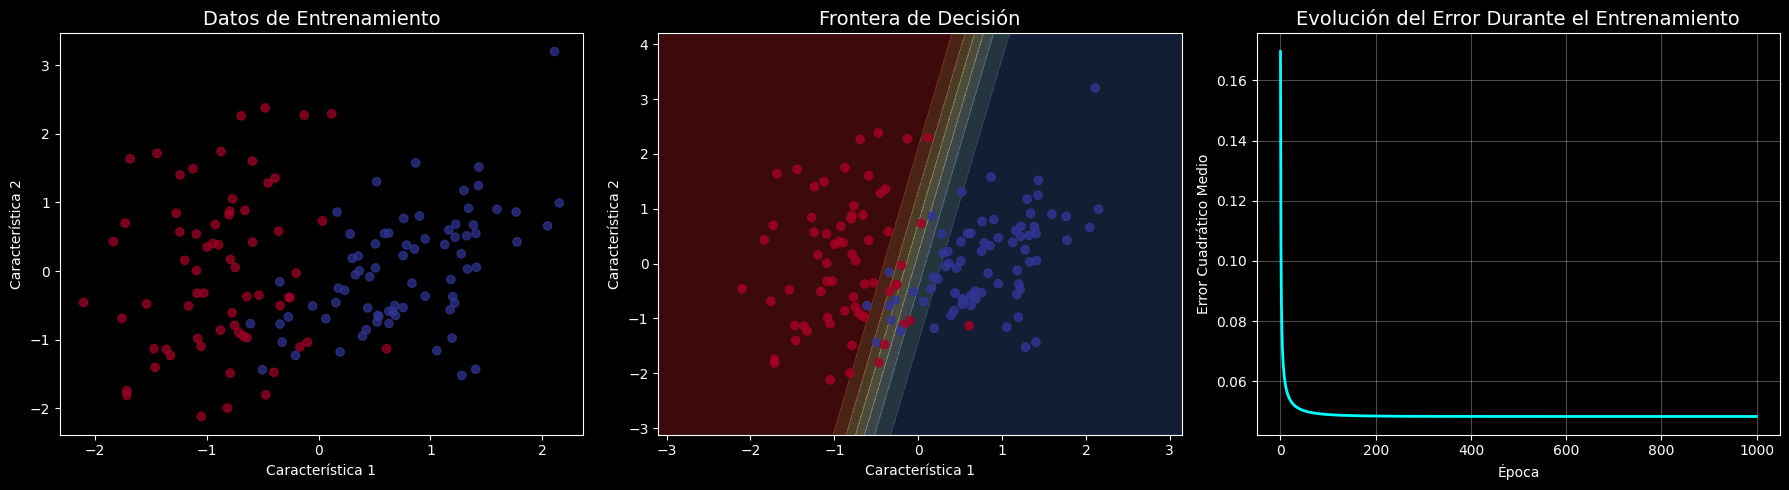


EJEMPLO 2: LIMITACIONES DEL PERCEPTRÓN - PROBLEMA XOR
Tabla de verdad XOR:
X1 | X2 | XOR
------------
 0 |  0 |  0
 0 |  1 |  1
 1 |  0 |  1
 1 |  1 |  0
El error comienza a aumentar. Deteniendo en época 152.

Resultados del Perceptrón Simple:
Predicciones: [1 0 0 0]
Valores reales: [0 1 1 0]
Precisión: 0.250

¡El perceptrón simple NO puede resolver XOR!


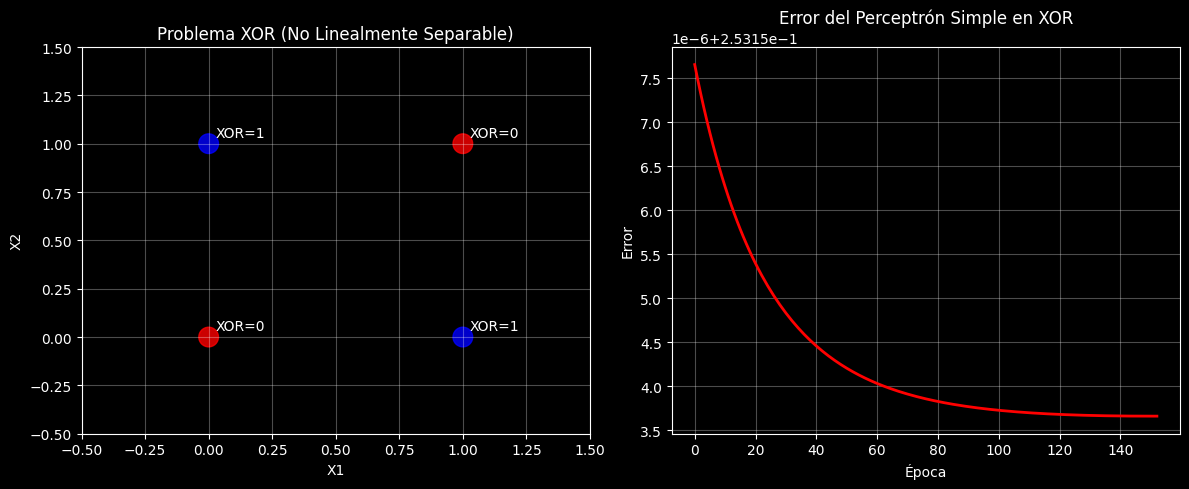


EJEMPLO 3: PERCEPTRÓN MULTICAPA (MLP) - RESOLVIENDO XOR
Arquitectura del MLP:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer (Dense)            │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)


Resultados del MLP:
Entrada | Esperado | Predicción | Probabilidad
---------------------------------------------
  [0. 0.]  |    0.0     |     0      |   0.408
  [0. 1.]  |    1.0     |     0      |   0.408
  [1. 0.]  |    1.0     |     1      |   0.777
  [1. 1.]  |    0.0     |     0      |   0.408

Precisión: 0.750
¡El MLP SÍ puede resolver XOR!


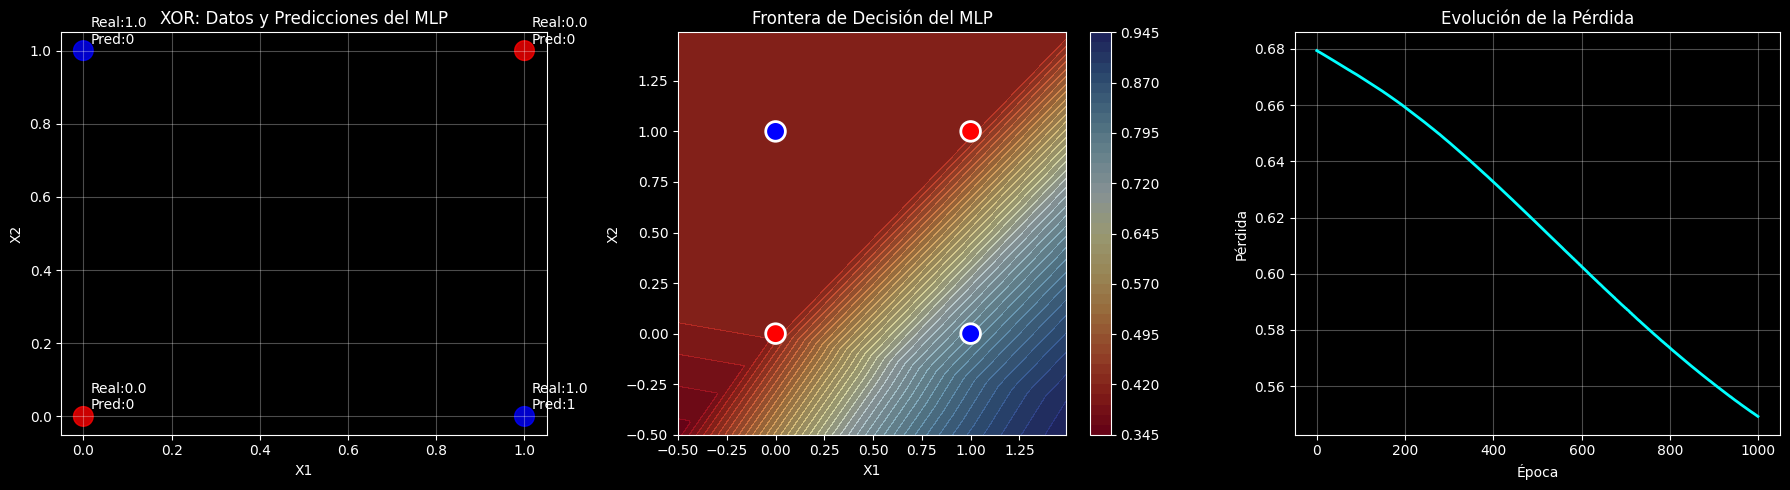


EJEMPLO 4: CLASIFICACIÓN MULTICLASE CON SOFTMAX
Precisión en entrenamiento: 0.964
Precisión en prueba: 0.956


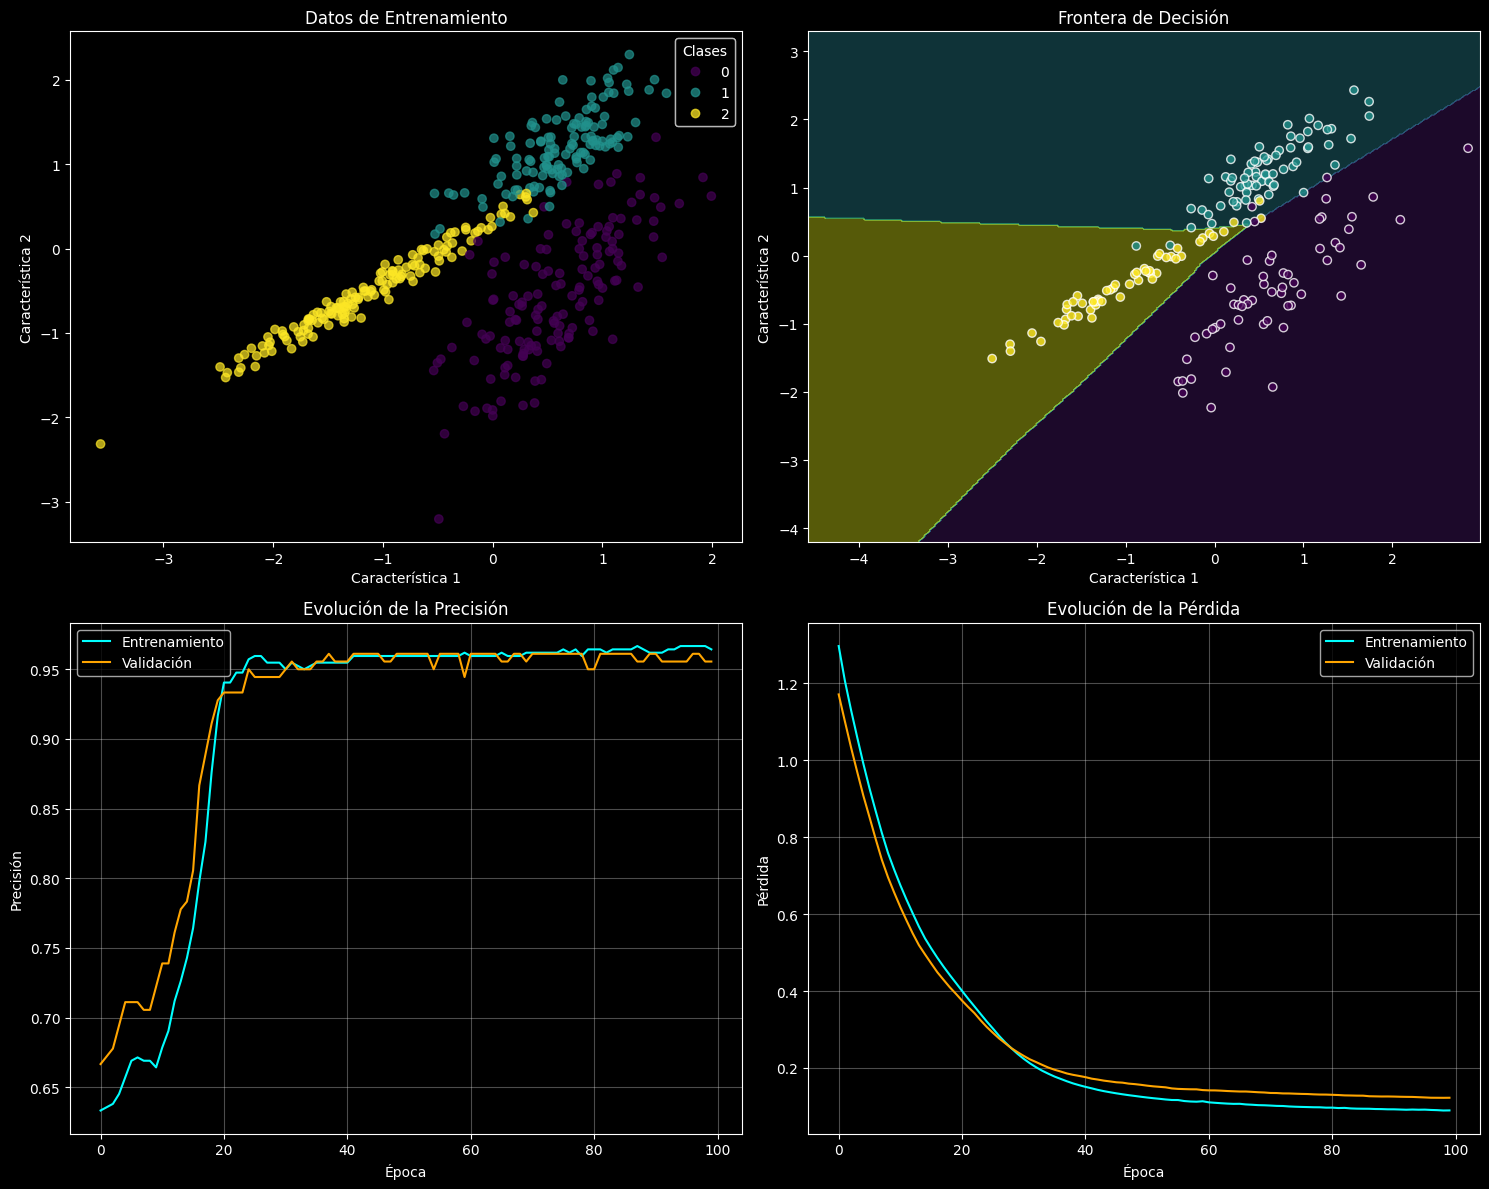


EJEMPLO 5: TÉCNICAS DE REGULARIZACIÓN
Entrenando modelo sin regularización...
Entrenando modelo con regularización L2...
Entrenando modelo con Dropout...

Resultados finales:
--------------------------------------------------
Sin Regularización:
  Precisión entrenamiento: 0.779
  Precisión prueba: 0.800
  Diferencia (overfitting): -0.021

Con L2:
  Precisión entrenamiento: 0.771
  Precisión prueba: 0.767
  Diferencia (overfitting): 0.005

Con Dropout:
  Precisión entrenamiento: 0.764
  Precisión prueba: 0.800
  Diferencia (overfitting): -0.036



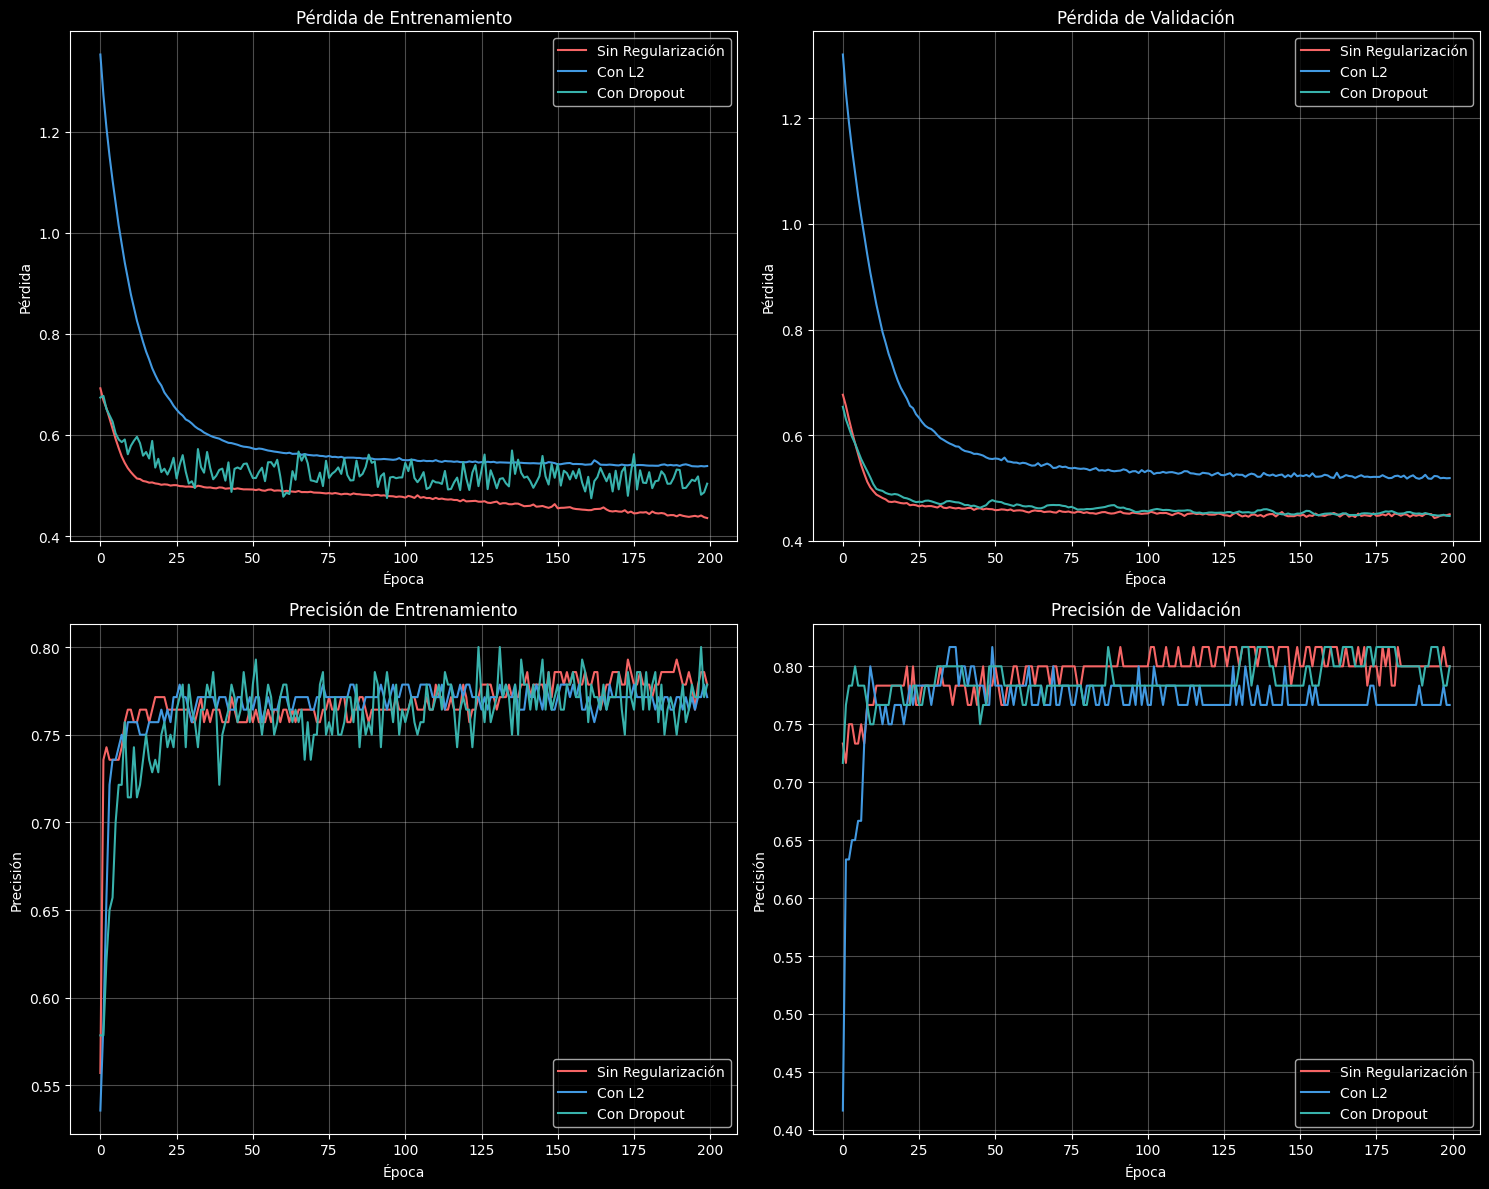


EJEMPLO 6: EARLY STOPPING
Restoring model weights from the end of the best epoch: 492.

Precisión final en prueba (con mejores pesos): 1.000


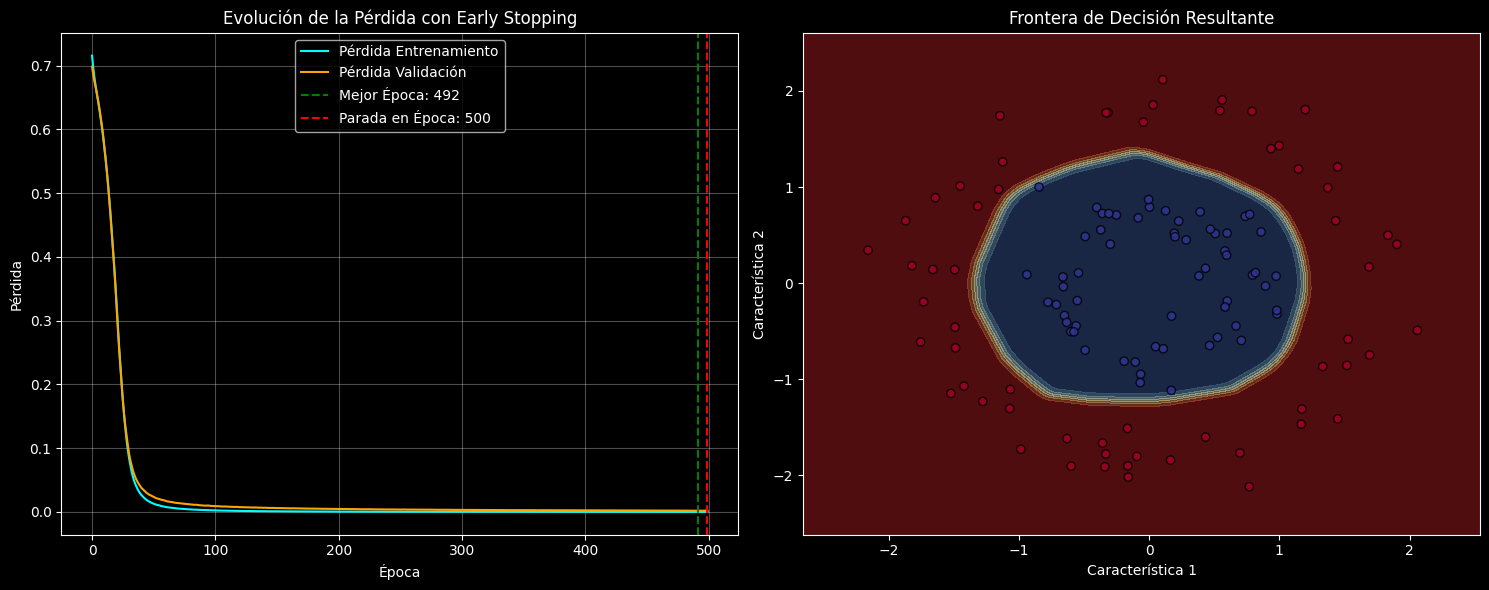


DEMOSTRACIÓN COMPLETA FINALIZADA


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo para visualizaciones
plt.style.use('dark_background')
sns.set_palette("husl")

class PerceptronSimple:
    """
    Implementación manual del Perceptrón Simple para demostrar los conceptos básicos
    """
    def __init__(self, learning_rate=0.01, max_epochs=1000):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None
        self.errors_history = []

    def sigmoid(self, z):
        """Función de activación sigmoide"""
        # Evitar overflow numérico
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Entrenar el perceptrón"""
        n_samples, n_features = X.shape

        # Inicializar pesos y bias
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0

        # Proceso de entrenamiento
        for epoch in range(self.max_epochs):
            total_error = 0

            for i in range(n_samples):
                # Forward propagation
                z = np.dot(X[i], self.weights) + self.bias
                prediction = self.sigmoid(z)

                # Calcular error
                error = y[i] - prediction
                total_error += error**2

                # Backpropagation (actualización de pesos)
                self.weights += self.learning_rate * error * prediction * (1 - prediction) * X[i]
                self.bias += self.learning_rate * error * prediction * (1 - prediction)

            self.errors_history.append(total_error / n_samples)

            # Criterio de parada temprana simple
            if epoch > 10 and self.errors_history[-1] > self.errors_history[-2]:
                print(f"El error comienza a aumentar. Deteniendo en época {epoch}.")
                break
            if total_error / n_samples < 0.01:
                print(f"Convergencia alcanzada en época {epoch}")
                break

    def predict(self, X):
        """Realizar predicciones"""
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def predict_class(self, X):
        """Predicción de clase (0 o 1)"""
        return (self.predict(X) >= 0.5).astype(int)

def ejemplo_perceptron_simple():
    """
    Ejemplo 1: Demostración del Perceptrón Simple
    """
    print("=" * 60)
    print("EJEMPLO 1: PERCEPTRÓN SIMPLE")
    print("=" * 60)

    # Generar datos linealmente separables
    X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                              n_informative=2, n_clusters_per_class=1,
                              random_state=42, class_sep=1.5)

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Normalizar datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Entrenar perceptrón
    perceptron = PerceptronSimple(learning_rate=0.1, max_epochs=1000)
    perceptron.fit(X_train_scaled, y_train)

    # Evaluar modelo
    train_predictions = perceptron.predict_class(X_train_scaled)
    test_predictions = perceptron.predict_class(X_test_scaled)

    train_accuracy = np.mean(train_predictions == y_train)
    test_accuracy = np.mean(test_predictions == y_test)

    print(f"Precisión en entrenamiento: {train_accuracy:.3f}")
    print(f"Precisión en prueba: {test_accuracy:.3f}")

    # Visualizar resultados
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Gráfico 1: Datos originales
    scatter = axes[0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                             c=y_train, cmap='RdYlBu', alpha=0.7)
    axes[0].set_title('Datos de Entrenamiento', fontsize=14, color='white')
    axes[0].set_xlabel('Característica 1', color='white')
    axes[0].set_ylabel('Característica 2', color='white')

    # Gráfico 2: Frontera de decisión
    h = 0.02
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = perceptron.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    axes[1].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    scatter = axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                             c=y_train, cmap='RdYlBu', alpha=0.8)
    axes[1].set_title('Frontera de Decisión', fontsize=14, color='white')
    axes[1].set_xlabel('Característica 1', color='white')
    axes[1].set_ylabel('Característica 2', color='white')

    # Gráfico 3: Evolución del error
    axes[2].plot(perceptron.errors_history, color='cyan', linewidth=2)
    axes[2].set_title('Evolución del Error Durante el Entrenamiento', fontsize=14, color='white')
    axes[2].set_xlabel('Época', color='white')
    axes[2].set_ylabel('Error Cuadrático Medio', color='white')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return perceptron, X_train_scaled, y_train

def ejemplo_problema_xor():
    """
    Ejemplo 2: Demostración de las limitaciones del Perceptrón Simple con XOR
    """
    print("\n" + "=" * 60)
    print("EJEMPLO 2: LIMITACIONES DEL PERCEPTRÓN - PROBLEMA XOR")
    print("=" * 60)

    # Datos XOR (no linealmente separables)
    X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor = np.array([0, 1, 1, 0])  # XOR logic

    print("Tabla de verdad XOR:")
    print("X1 | X2 | XOR")
    print("-" * 12)
    for i in range(len(X_xor)):
        print(f" {X_xor[i][0]} |  {X_xor[i][1]} |  {y_xor[i]}")

    # Intentar entrenar perceptrón simple
    perceptron_xor = PerceptronSimple(learning_rate=0.1, max_epochs=1000)
    perceptron_xor.fit(X_xor, y_xor)

    predictions = perceptron_xor.predict_class(X_xor)
    accuracy = np.mean(predictions == y_xor)

    print(f"\nResultados del Perceptrón Simple:")
    print(f"Predicciones: {predictions}")
    print(f"Valores reales: {y_xor}")
    print(f"Precisión: {accuracy:.3f}")
    print("\n¡El perceptrón simple NO puede resolver XOR!")

    # Visualizar el problema
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Gráfico 1: Datos XOR
    colors = ['red' if y == 0 else 'blue' for y in y_xor]
    axes[0].scatter(X_xor[:, 0], X_xor[:, 1], c=colors, s=200, alpha=0.8)
    for i, (x, y) in enumerate(X_xor):
        axes[0].annotate(f'XOR={y_xor[i]}', (x, y), xytext=(5, 5),
                        textcoords='offset points', color='white')
    axes[0].set_xlim(-0.5, 1.5)
    axes[0].set_ylim(-0.5, 1.5)
    axes[0].set_title('Problema XOR (No Linealmente Separable)', color='white')
    axes[0].set_xlabel('X1', color='white')
    axes[0].set_ylabel('X2', color='white')
    axes[0].grid(True, alpha=0.3)

    # Gráfico 2: Evolución del error
    axes[1].plot(perceptron_xor.errors_history, color='red', linewidth=2)
    axes[1].set_title('Error del Perceptrón Simple en XOR', color='white')
    axes[1].set_xlabel('Época', color='white')
    axes[1].set_ylabel('Error', color='white')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return X_xor, y_xor

def ejemplo_mlp_keras():
    """
    Ejemplo 3: Perceptrón Multicapa con Keras para resolver XOR
    """
    print("\n" + "=" * 60)
    print("EJEMPLO 3: PERCEPTRÓN MULTICAPA (MLP) - RESOLVIENDO XOR")
    print("=" * 60)

    # Datos XOR
    X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
    y_xor = np.array([0, 1, 1, 0], dtype=np.float32)

    # Crear modelo MLP
    model = keras.Sequential([
        layers.Dense(4, activation='relu', input_shape=(2,), name='hidden_layer'),
        layers.Dense(1, activation='sigmoid', name='output_layer')
    ])

    # Compilar modelo
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    print("Arquitectura del MLP:")
    model.summary()

    # Entrenar modelo
    history = model.fit(X_xor, y_xor, epochs=1000, verbose=0, batch_size=4)

    # Evaluar modelo
    predictions = model.predict(X_xor, verbose=0)
    predicted_classes = (predictions > 0.5).astype(int).flatten()

    print(f"\nResultados del MLP:")
    print("Entrada | Esperado | Predicción | Probabilidad")
    print("-" * 45)
    for i in range(len(X_xor)):
        print(f"  {X_xor[i]}  |    {y_xor[i]}     |     {predicted_classes[i]}      |   {predictions[i][0]:.3f}")

    accuracy = np.mean(predicted_classes == y_xor)
    print(f"\nPrecisión: {accuracy:.3f}")
    print("¡El MLP SÍ puede resolver XOR!")

    # Visualizar resultados
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Gráfico 1: Datos y predicciones
    colors = ['red' if y == 0 else 'blue' for y in y_xor]
    axes[0].scatter(X_xor[:, 0], X_xor[:, 1], c=colors, s=200, alpha=0.8)
    for i, (x, y) in enumerate(X_xor):
        axes[0].annotate(f'Real:{y_xor[i]}\nPred:{predicted_classes[i]}',
                        (x, y), xytext=(5, 5), textcoords='offset points',
                        color='white', fontsize=10)
    axes[0].set_title('XOR: Datos y Predicciones del MLP', color='white')
    axes[0].set_xlabel('X1', color='white')
    axes[0].set_ylabel('X2', color='white')
    axes[0].grid(True, alpha=0.3)

    # Gráfico 2: Frontera de decisión
    h = 0.01
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points, verbose=0)
    Z = Z.reshape(xx.shape)

    contour = axes[1].contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
    axes[1].scatter(X_xor[:, 0], X_xor[:, 1], c=colors, s=200, alpha=1, edgecolor='white', linewidth=2)
    axes[1].set_title('Frontera de Decisión del MLP', color='white')
    axes[1].set_xlabel('X1', color='white')
    axes[1].set_ylabel('X2', color='white')
    plt.colorbar(contour, ax=axes[1])

    # Gráfico 3: Evolución de la pérdida
    axes[2].plot(history.history['loss'], color='cyan', linewidth=2)
    axes[2].set_title('Evolución de la Pérdida', color='white')
    axes[2].set_xlabel('Época', color='white')
    axes[2].set_ylabel('Pérdida', color='white')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return model, history

def ejemplo_clasificacion_multiclase():
    """
    Ejemplo 4: Clasificación Multiclase con Softmax
    """
    print("\n" + "=" * 60)
    print("EJEMPLO 4: CLASIFICACIÓN MULTICLASE CON SOFTMAX")
    print("=" * 60)

    # Generar datos multiclase
    X, y = make_classification(n_samples=600, n_features=2, n_redundant=0,
                              n_informative=2, n_classes=3, n_clusters_per_class=1,
                              random_state=42, class_sep=1.2)

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Normalizar
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Crear modelo para clasificación multiclase
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(2,)),
        layers.Dense(8, activation='relu'),
        layers.Dense(3, activation='softmax')  # 3 clases, activación softmax
    ])

    # Compilar con categorical crossentropy
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Para etiquetas enteras
                  metrics=['accuracy'])

    # Entrenar
    history = model.fit(X_train_scaled, y_train,
                       validation_data=(X_test_scaled, y_test),
                       epochs=100, verbose=0, batch_size=32)

    # Evaluar
    train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
    test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)

    print(f"Precisión en entrenamiento: {train_acc:.3f}")
    print(f"Precisión en prueba: {test_acc:.3f}")

    # Predicciones
    predictions = model.predict(X_test_scaled, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)

    # Visualizar resultados
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Gráfico 1: Datos de entrenamiento
    scatter = axes[0,0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                               c=y_train, cmap='viridis', alpha=0.7)
    axes[0,0].set_title('Datos de Entrenamiento', color='white')
    axes[0,0].set_xlabel('Característica 1', color='white')
    axes[0,0].set_ylabel('Característica 2', color='white')
    legend1 = axes[0,0].legend(*scatter.legend_elements(), title="Clases")
    axes[0,0].add_artist(legend1)

    # Gráfico 2: Frontera de decisión
    h = 0.02
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points, verbose=0)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    axes[0,1].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    scatter = axes[0,1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                               c=y_test, cmap='viridis', alpha=0.8, edgecolor='white')
    axes[0,1].set_title('Frontera de Decisión', color='white')
    axes[0,1].set_xlabel('Característica 1', color='white')
    axes[0,1].set_ylabel('Característica 2', color='white')

    # Gráfico 3: Evolución de la precisión
    axes[1,0].plot(history.history['accuracy'], label='Entrenamiento', color='cyan')
    axes[1,0].plot(history.history['val_accuracy'], label='Validación', color='orange')
    axes[1,0].set_title('Evolución de la Precisión', color='white')
    axes[1,0].set_xlabel('Época', color='white')
    axes[1,0].set_ylabel('Precisión', color='white')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

    # Gráfico 4: Evolución de la pérdida
    axes[1,1].plot(history.history['loss'], label='Entrenamiento', color='cyan')
    axes[1,1].plot(history.history['val_loss'], label='Validación', color='orange')
    axes[1,1].set_title('Evolución de la Pérdida', color='white')
    axes[1,1].set_xlabel('Época', color='white')
    axes[1,1].set_ylabel('Pérdida', color='white')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return model, history, scaler

def ejemplo_regularizacion():
    """
    Ejemplo 5: Demostración de Técnicas de Regularización
    """
    print("\n" + "=" * 60)
    print("EJEMPLO 5: TÉCNICAS DE REGULARIZACIÓN")
    print("=" * 60)

    # Generar datos con ruido para inducir overfitting
    X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                              n_informative=2, n_clusters_per_class=1,
                              random_state=42, class_sep=0.8, flip_y=0.1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Modelo 1: Sin regularización (propenso a overfitting)
    model_no_reg = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(2,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    # Modelo 2: Con regularización L2
    model_l2 = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(2,),
                    kernel_regularizer=keras.regularizers.l2(0.01)),
        layers.Dense(32, activation='relu',
                    kernel_regularizer=keras.regularizers.l2(0.01)),
        layers.Dense(16, activation='relu',
                    kernel_regularizer=keras.regularizers.l2(0.01)),
        layers.Dense(1, activation='sigmoid')
    ])

    # Modelo 3: Con Dropout
    model_dropout = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(2,)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])

    # Compilar modelos
    for model in [model_no_reg, model_l2, model_dropout]:
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar modelos
    epochs = 200

    print("Entrenando modelo sin regularización...")
    history_no_reg = model_no_reg.fit(X_train_scaled, y_train,
                                     validation_data=(X_test_scaled, y_test),
                                     epochs=epochs, verbose=0, batch_size=16)

    print("Entrenando modelo con regularización L2...")
    history_l2 = model_l2.fit(X_train_scaled, y_train,
                             validation_data=(X_test_scaled, y_test),
                             epochs=epochs, verbose=0, batch_size=16)

    print("Entrenando modelo con Dropout...")
    history_dropout = model_dropout.fit(X_train_scaled, y_train,
                                       validation_data=(X_test_scaled, y_test),
                                       epochs=epochs, verbose=0, batch_size=16)

    # Evaluar modelos
    models = [model_no_reg, model_l2, model_dropout]
    histories = [history_no_reg, history_l2, history_dropout]
    names = ['Sin Regularización', 'Con L2', 'Con Dropout']

    print("\nResultados finales:")
    print("-" * 50)
    for i, (model, name) in enumerate(zip(models, names)):
        train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
        test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
        print(f"{name}:")
        print(f"  Precisión entrenamiento: {train_acc:.3f}")
        print(f"  Precisión prueba: {test_acc:.3f}")
        print(f"  Diferencia (overfitting): {train_acc - test_acc:.3f}")
        print()

    # Visualizar comparación
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    colors = ['#f56565', '#4299e1', '#38b2ac'] # Red, Blue, Green

    # Gráfico 1: Evolución de la pérdida de entrenamiento
    for i, (history, name, color) in enumerate(zip(histories, names, colors)):
        axes[0,0].plot(history.history['loss'], label=f'{name}', color=color)
    axes[0,0].set_title('Pérdida de Entrenamiento', color='white')
    axes[0,0].set_xlabel('Época', color='white')
    axes[0,0].set_ylabel('Pérdida', color='white')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # Gráfico 2: Evolución de la pérdida de validación
    for i, (history, name, color) in enumerate(zip(histories, names, colors)):
        axes[0,1].plot(history.history['val_loss'], label=f'{name}', color=color)
    axes[0,1].set_title('Pérdida de Validación', color='white')
    axes[0,1].set_xlabel('Época', color='white')
    axes[0,1].set_ylabel('Pérdida', color='white')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

    # Gráfico 3: Evolución de la precisión de entrenamiento
    for i, (history, name, color) in enumerate(zip(histories, names, colors)):
        axes[1,0].plot(history.history['accuracy'], label=f'{name}', color=color)
    axes[1,0].set_title('Precisión de Entrenamiento', color='white')
    axes[1,0].set_xlabel('Época', color='white')
    axes[1,0].set_ylabel('Precisión', color='white')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

    # Gráfico 4: Evolución de la precisión de validación
    for i, (history, name, color) in enumerate(zip(histories, names, colors)):
        axes[1,1].plot(history.history['val_accuracy'], label=f'{name}', color=color)
    axes[1,1].set_title('Precisión de Validación', color='white')
    axes[1,1].set_xlabel('Época', color='white')
    axes[1,1].set_ylabel('Precisión', color='white')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return models, histories

def ejemplo_early_stopping():
    """
    Ejemplo 6: Early Stopping en acción
    """
    print("\n" + "=" * 60)
    print("EJEMPLO 6: EARLY STOPPING")
    print("=" * 60)

    # Generar datos complejos
    X, y = make_circles(n_samples=400, noise=0.1, factor=0.4, random_state=42)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Modelo con Early Stopping
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=(2,)),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Configurar Early Stopping
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        verbose=1
    )

    # Entrenar con Early Stopping
    history = model.fit(X_train_scaled, y_train,
                       validation_data=(X_test_scaled, y_test),
                       epochs=500,  # Entrenar por muchas épocas, EarlyStopping decidirá cuándo parar
                       verbose=0,
                       callbacks=[early_stopping])

    # Evaluar
    test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"\nPrecisión final en prueba (con mejores pesos): {test_acc:.3f}")

    # Visualizar
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico 1: Evolución de la pérdida y punto de parada
    axes[0].plot(history.history['loss'], label='Pérdida Entrenamiento', color='cyan')
    axes[0].plot(history.history['val_loss'], label='Pérdida Validación', color='orange')

    best_epoch = np.argmin(history.history['val_loss'])
    axes[0].axvline(best_epoch, color='green', linestyle='--', label=f'Mejor Época: {best_epoch+1}')
    axes[0].axvline(len(history.history['loss'])-1, color='red', linestyle='--', label=f'Parada en Época: {len(history.history["loss"])}')

    axes[0].set_title('Evolución de la Pérdida con Early Stopping', color='white')
    axes[0].set_xlabel('Época', color='white')
    axes[0].set_ylabel('Pérdida', color='white')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Gráfico 2: Frontera de decisión
    h = 0.02
    x_min, x_max = X_test_scaled[:, 0].min() - 0.5, X_test_scaled[:, 0].max() + 0.5
    y_min, y_max = X_test_scaled[:, 1].min() - 0.5, X_test_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points, verbose=0)
    Z = Z.reshape(xx.shape)

    axes[1].contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    scatter = axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                               c=y_test, cmap='RdYlBu', alpha=0.8, edgecolor='black')
    axes[1].set_title('Frontera de Decisión Resultante', color='white')
    axes[1].set_xlabel('Característica 1', color='white')
    axes[1].set_ylabel('Característica 2', color='white')

    plt.tight_layout()
    plt.show()

    return model, history

if __name__ == '__main__':
    # Ejecutar todos los ejemplos en orden

    # 1. Perceptrón Simple en datos linealmente separables
    ejemplo_perceptron_simple()

    # 2. Limitaciones del Perceptrón con el problema XOR
    ejemplo_problema_xor()

    # 3. Usando un MLP para resolver el problema XOR
    ejemplo_mlp_keras()

    # 4. Clasificación multiclase con Softmax
    ejemplo_clasificacion_multiclase()

    # 5. Comparando técnicas de regularización para combatir el overfitting
    ejemplo_regularizacion()

    # 6. Demostración de Early Stopping para detener el entrenamiento óptimamente
    ejemplo_early_stopping()

    print("\n" + "=" * 60)
    print("DEMOSTRACIÓN COMPLETA FINALIZADA")
    print("=" * 60)